# 1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default="svg"

# 2. Importing the dataset

In [2]:
raw_df=pd.read_csv("Zomato Chennai Listing 2020.csv",delimiter=',')

In [3]:
raw_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


# 3. Getting Basic Information about the Dataset

In [4]:
raw_df.shape

(12032, 12)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          12032 non-null  object 
 8   Dining Rating Count    12032 non-null  object 
 9   Delivery Rating        12032 non-null  object 
 10  Delivery Rating Count  12032 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [6]:
raw_df.describe()

,Price for 2
count,12032.000000
mean,397.611370
std,332.045938
min,40.000000
25%,200.000000
50%,300.000000
75%,450.000000
max,5000.000000


# 4. Cleaning the dataset

a.Removing null values

In [7]:
raw_df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [8]:
raw_df["Delivery Rating"].fillna(0,inplace=True)

In [9]:
raw_df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

c. Converting the datatypes of numerical columns to numeric datatype

In [10]:
raw_df['Dining Rating Count'].value_counts()

Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
877                             1
897                             1
872                             1
1197                            1
224                             1
Name: Dining Rating Count, Length: 794, dtype: int64

In [11]:
to_replace = {'Does not offer Dining': '0', 'Not enough Dining Reviews': '0'}
raw_df['Dining Rating Count'].replace(to_replace, inplace=True)

In [12]:
raw_df['Delivery Rating Count'].value_counts()

Not enough Delivery Reviews    3379
Does not offer Delivery        2252
None                            220
27                               34
37                               30
                               ... 
3530                              1
7705                              1
6374                              1
1773                              1
1617                              1
Name: Delivery Rating Count, Length: 2282, dtype: int64

In [13]:
to_replace = {'Not enough Delivery Reviews': '0', 'Does not offer Delivery': '0'}
raw_df['Delivery Rating Count'].replace(to_replace, inplace=True)

In [14]:
print(raw_df['Delivery Rating'].unique())


['4.3' '4.1' '4.4' '4.0' '3.8' '4.2' '3.9' '3.6' 'None' '3.3' '3.4' '3.7'
 '3.5' '4.5' '2.9' '4.6' '3.1' '2.7' '3.2' '3.0' '2.8' '2.3' '2.4' '2.5'
 '4.7' '2.6' '2.2' '2.1' '2.0' '1.8' '1.6' '1.5' '0.3']


In [15]:
raw_df['Delivery Rating'] = raw_df['Delivery Rating'].replace('None', np.nan).astype('float64')
raw_df['Dining Rating Count'] = raw_df['Dining Rating Count'].replace('None', np.nan).astype('float64')
raw_df['Delivery Rating Count'] = raw_df['Delivery Rating Count'].replace('None', np.nan).astype('float64')

In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          12032 non-null  object 
 8   Dining Rating Count    11812 non-null  float64
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  float64
 11  Features               12032 non-null  object 
dtypes: float64(4), object(8)
memory usage: 1.1+ MB


e. Removing the restaurant records whose Dining Rating Count or Delivery Rating Count is 0

In [17]:
useless_data=(raw_df['Dining Rating Count']==0.0) | (raw_df['Delivery Rating Count']==0.0)
raw_df[useless_data]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,https://www.zomato.com/chennai/bai-veetu-kalya...,Bai Veetu Kalyanam,"1/187, Thalambur Road, Navallur, Chennai",Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350.0,None,0.0,4.3,1061.0,['Home Delivery']
15,https://www.zomato.com/chennai/welcome-hotel-p...,Welcome Hotel,"112/241, Purasawalkam High Road, Purasavakkam...",Purasavakkam,"['South Indian', ' Desserts', ' Beverages']","['Pongal', ' Podi Dosa', ' Idli Sambar', ' Vad...",300.0,4.5,1094.0,NaN,0.0,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."
18,https://www.zomato.com/chennai/wire-room-bar-k...,Wire Room Bar & Kitchen,"142, Phoenix Marketcity, New NGO Colony, Vela...","Phoenix Market City, Velachery","['Continental', ' Asian']","['Cocktails', ' Salad', ' Beer', ' Tikka', ' P...",2000.0,4.1,354.0,NaN,0.0,"['Full Bar Available', 'Mall Parking', 'Dance ..."
23,https://www.zomato.com/chennai/bff-2-0-ra-puram,BFF 2.0,"80/29, 2nd Main Road, RA Puram, Chennai",RA Puram,"['North Indian', ' Continental', ' Italian']","['Crispy Chicken', ' Cocktails', ' Pizza', ' N...",1500.0,4.2,464.0,NaN,0.0,"['Full Bar Available', 'Indoor Seating', 'Nigh..."
77,https://www.zomato.com/chennai/al-dhareeq-beef...,Al Dhareeq Beef Biriyani,"64/A, 162, Sivan Kovil South Street, Kodambak...",Kodambakkam,['Biryani'],['Beef Biryani'],300.0,None,0.0,3.9,19600.0,['Home Delivery']
...,...,...,...,...,...,...,...,...,...,...,...,...
12014,https://www.zomato.com/chennai/bowl-bazaar-adyar,Bowl Bazaar,Delivery Only,Adyar,"['North Indian', ' South Indian', ' Chinese', ...",Invalid,500.0,None,0.0,NaN,0.0,['Delivery Only']
12015,https://www.zomato.com/chennai/bowl-bazaar-med...,Bowl Bazaar,Delivery Only,Medavakkam,"['North Indian', ' South Indian', ' Chinese', ...",Invalid,500.0,None,0.0,NaN,0.0,['Delivery Only']
12016,https://www.zomato.com/chennai/bowl-bazaar-1-p...,Bowl Bazaar,Delivery Only,Perungudi,"['North Indian', ' South Indian', ' Chinese']",Invalid,400.0,None,0.0,NaN,0.0,['Delivery Only']
12017,https://www.zomato.com/chennai/bowl-bazaar-1-m...,Bowl Bazaar,Delivery Only,Medavakkam,"['North Indian', ' South Indian', ' Chinese']",Invalid,400.0,None,0.0,NaN,0.0,['Delivery Only']


In [18]:
raw_df=raw_df[~useless_data]

h. Removing duplicate records

In [19]:
raw_df[raw_df.duplicated()]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


4. Copying the cleaned data into a new DataFrame

In [20]:
zomato_df=raw_df.copy()

In [21]:
zomato_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500.0,4.3,9306.0,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059.0,4.1,39200.0,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361.0,4.4,10500.0,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101.0,4.0,11200.0,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617.0,4.1,22400.0,"['Home Delivery', 'Indoor Seating']"


5. Performing Exploratory Data Analysis


a. Which are the top 10 highest rated Seafood restaurant in Chennai based on Dining Rating?

In [22]:
seafood_df=zomato_df[zomato_df['Cuisine'].str.contains('Seafood')]
seafood_df.sort_values(by='Dining Rating',ascending=False).head(10)

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
4878,https://www.zomato.com/chennai/maamisa-mall-vi...,Maamisa Mall,"49, Jrcot, Virugambakkam, Chennai",Virugambakkam,"['South Indian', ' Seafood']",Invalid,250.0,None,NaN,NaN,NaN,['Takeaway Only']
7030,https://www.zomato.com/chennai/chennai-cloud-k...,Chennai Cloud Kitchen,Delivery Only,Ekkaduthangal,"['South Indian', ' Biryani', ' Chinese', ' Nor...",Invalid,250.0,None,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
7910,https://www.zomato.com/chennai/bike-barbeque-b...,Bike Barbeque - BBQ Ride,"Door T21 - A & B, 6th Avenue, Opposite Elliot...",Besant Nagar,"['BBQ', ' Charcoal Chicken', ' Seafood']",Invalid,250.0,None,NaN,NaN,NaN,"['Home Delivery', 'Indoor Seating']"
8683,https://www.zomato.com/chennai/7-eleven-kitche...,7 Eleven Kitchen,"7, S 2, Lakshmi Nagar, Indra Nagar, IAF Road ...",Tambaram,"['Biryani', ' Seafood', ' Chinese']",Invalid,250.0,None,NaN,NaN,NaN,"['Breakfast', 'Free Parking', 'Indoor Seating']"
195,https://www.zomato.com/chennai/the-marina-nung...,The Marina,"39, College Road, Nungambakkam, Chennai",Nungambakkam,"['Seafood', ' North Indian', ' Chinese']","['Sea Food', ' Jumbo Prawns', ' Biryani', ' Fi...",1600.0,4.8,1082.0,4.3,373.0,"['Home Delivery', 'Indoor Seating', 'Table res..."
214,https://www.zomato.com/chennai/sera-the-tapas-...,Sera - The Tapas Bar & Restaurant,"71, Cathedral Road, Gopalapuram, Chennai",Gopalapuram,"['Finger Food', ' Seafood', ' Italian', ' Cont...","['Cocktails', ' Pasta', ' Nachos', ' Mashed Po...",1600.0,4.5,964.0,3.4,50.0,"['Home Delivery', 'Full Bar Available', 'Free ..."
315,https://www.zomato.com/chennai/layalee-ekkadut...,Layalee,"12A, Near Jaya TV Signal, Jawaharlal Nehru Ro...",Ekkaduthangal,"['Arabian', ' BBQ', ' Seafood', ' Chinese', ' ...","['Fish', ' Faluda', ' Shawarma', ' Brownie', '...",700.0,4.4,586.0,4.1,143.0,"['Home Delivery', 'Table booking recommended',..."
96,https://www.zomato.com/chennai/urban-spatula-a...,Urban Spatula,"Plot 1633, 54, H-Block, Ground Floor, 13th Ma...",Anna Nagar West,"['Continental', ' Seafood', ' Biryani', ' Ital...","['Burgers', ' Pasta', ' Fish', ' Fries', ' Chi...",800.0,4.4,794.0,4.3,911.0,"['Home Delivery', 'Free Parking', 'Table booki..."
9028,https://www.zomato.com/chennai/copper-kitchen-...,Copper Kitchen,"1, 100 Feet Bypass Road, Velachery, Chennai",Velachery,"['North Indian', ' Chinese', ' Chettinad', ' S...","['Biryani', ' Faluda', ' Tandoori Chicken', ' ...",1000.0,4.3,814.0,3.6,4673.0,"['Home Delivery', 'Lunch Menu', 'Valet Parking..."
9027,https://www.zomato.com/chennai/copper-kitchen-...,Copper Kitchen,"19B,Gandhi Mandapam Road, Opposite Anna Cente...",Kotturpuram,"['North Indian', ' Chinese', ' Chettinad', ' S...","['Brownie', ' Faluda', ' Biryani', ' Bbq Chick...",1000.0,4.3,1739.0,3.7,8659.0,"['Home Delivery', 'Indoor Seating', 'Table boo..."


a. Which is the best Food Truck in Chennai based on Delivery Rating?

In [23]:
foodtruck_df=zomato_df[zomato_df['Name of Restaurant'].str.contains('Food Truck')]
foodtruck_df.sort_values(by='Delivery Rating',ascending=False).head(2)

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
930,https://www.zomato.com/chaska-food-truck-food-...,Chaska Food Truck,"2/8, 4/9, 6/10, Valmiki Nagar, Thiruvanmiyur,...",Thiruvanmiyur,"['Tibetan', ' Chinese', ' Momos']","['Noodle', ' Schezwan Fried Rice', ' Pan Fried...",250.0,4.1,190.0,3.9,376.0,"['Home Delivery', 'Free Parking', 'Self Servic..."


b. Which areas have a large number of Chinese Restaurant Market?

In [24]:
chinese_df=zomato_df[zomato_df['Name of Restaurant'].str.contains('Chinese')]
chinese_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
130,https://www.zomato.com/chennai/the-chinese-sto...,The Chinese Story,"156, 1st Floor, Niranjan Square, Mount Poonam...",Porur,"['Chinese', ' Momos']","['Noodle', ' Momos', ' Chicken Lemon Coriander...",1000.0,4.4,593.0,4.1,6017.0,"['Home Delivery', 'Indoor Seating', 'Table boo..."
750,https://www.zomato.com/chennai/southern-chines...,Southern Chinese Restaurant,"Shop F 19, 1st Floor, 2nd Main Road, Anna Nag...",Anna Nagar East,"['Chinese', ' Momos', ' Thai', ' Japanese']","['Noodle', ' Momos', ' Drums Of Heaven', ' Dum...",600.0,4.0,227.0,4.0,1679.0,"['Home Delivery', 'Indoor Seating']"
933,https://www.zomato.com/chennai/shangai-chinese...,Shangai Chinese Kitchen,"302, Poonamallee High Road, Maduravoyal, Chennai",Maduravoyal,"['Chinese', ' Seafood']",Invalid,350.0,3.8,213.0,3.7,3564.0,"['Home Delivery', 'Indoor Seating']"
1914,https://www.zomato.com/chennai/mr-chinese-west...,Mr. Chinese,"217/95, Lake View Road, West Mambalam, Chennai",West Mambalam,"['Chinese', ' Biryani']","['Manchurian', ' Fried Rice Chicken']",400.0,3.2,78.0,3.2,1763.0,"['Home Delivery', 'Indoor Seating']"
3016,https://www.zomato.com/chennai/royal-chinese-f...,Royal Chinese Food,"34/2, Madhavam High Road, Ramamurthy Nagar, P...",Perambur,"['Chinese', ' Kerala']",Invalid,200.0,3.3,24.0,3.9,251.0,"['Home Delivery', 'Indoor Seating']"


In [25]:
chinese_rest_df = chinese_df.groupby(by='Location').agg({'Name of Restaurant': 'count', 'Price for 2': 'mean'}).rename(columns={'Name of Restaurant': 'COUNT OF RESTAURANTS'})
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)
chinese_rest_df.head()


,COUNT OF RESTAURANTS,Price for 2
Location,,
Anna Nagar East,1,600.0
Maduravoyal,1,350.0
Perambur,1,200.0
Porur,1,1000.0
West Mambalam,1,400.0


In [26]:
import pandas as pd

# Sample DataFrame with a custom index
data = {'Location': ['Anna Nagar East', 'Maduravoyal', 'Perambur','Porur','West mambalam'],
        'COUNT OF RESTAURANTS': [1,1,1,1,1],'Price for 2':[600.0,350.0,200.0,1000.0,400.0]}
index_values = ['a', 'b', 'c','d','e']

chinese_rest_df = pd.DataFrame(data, index=index_values)

print("Original DataFrame:")
print(chinese_rest_df)

# Resetting the index
df_reset = chinese_rest_df.reset_index()

print("\nDataFrame after resetting the index:")
print(df_reset)


Original DataFrame:
          Location  COUNT OF RESTAURANTS  Price for 2
a  Anna Nagar East                     1        600.0
b      Maduravoyal                     1        350.0
c         Perambur                     1        200.0
d            Porur                     1       1000.0
e    West mambalam                     1        400.0

DataFrame after resetting the index:
  index         Location  COUNT OF RESTAURANTS  Price for 2
0     a  Anna Nagar East                     1        600.0
1     b      Maduravoyal                     1        350.0
2     c         Perambur                     1        200.0
3     d            Porur                     1       1000.0
4     e    West mambalam                     1        400.0


In [27]:
pip install -U kaleido

In [28]:
import plotly.express as px

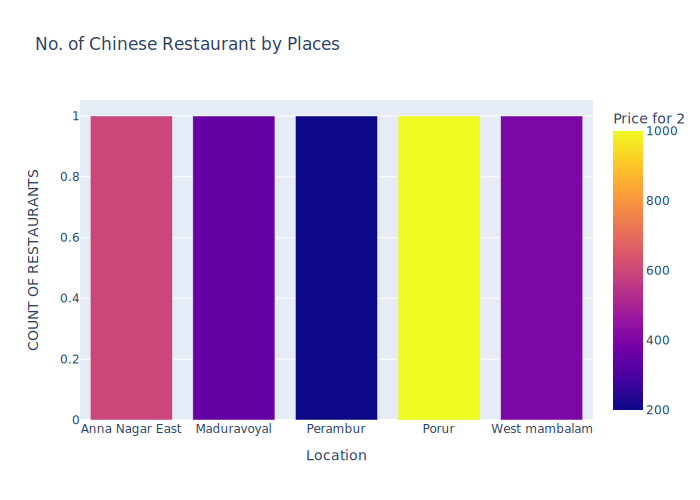

In [29]:
fig=px.bar(df_reset,x='Location',y='COUNT OF RESTAURANTS',color='Price for 2',title='No. of Chinese Restaurant by Places')
fig.show()

c. Is there a relation between Location and Price?

In [30]:
region_price_df=zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index()
region_price_df

,Location,Price for 2
0,Abhiramapuram,200.000000
1,Adambakkam,325.000000
2,Adyar,528.865979
3,Akkarai,535.714286
4,Alandur,442.857143
...,...,...
157,Vepery,342.105263
158,Vettuvankeni,475.000000
159,Virugambakkam,407.407407
160,Washermenpet,380.555556


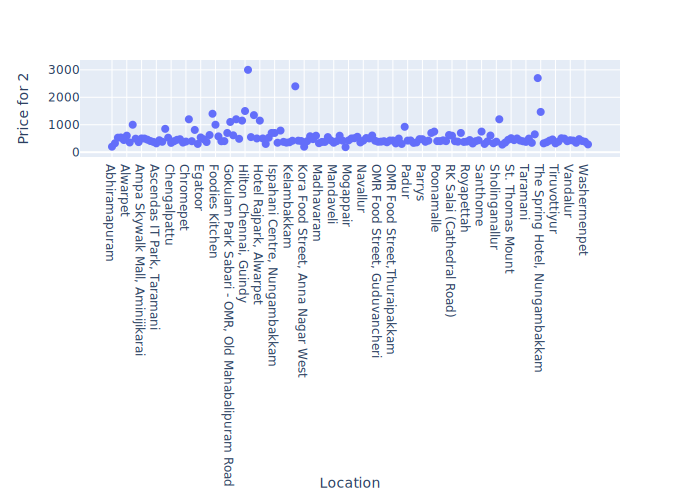

In [31]:
fig=px.scatter(region_price_df,x='Location',y='Price for 2').update_traces(marker_size=8)
fig.show()